In [186]:
import keras
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

In [9]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train = (1/255.0)*x_train
x_test = (1/255.0)*x_test
y_train = to_categorical(y_train.reshape([-1, 1]))
y_test = to_categorical(y_test.reshape([-1, 1]))

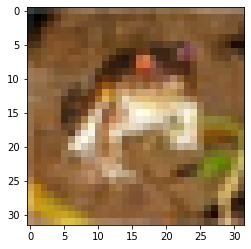

In [10]:
plt.imshow(x_train[0])

In [13]:
model = m.Sequential([l.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
l.MaxPooling2D((3,3)),
l.Conv2D(64, (3,3), padding='same', activation='relu'),
l.MaxPooling2D((3,3)),
l.Flatten(),
l.Dense(32, activation='relu'),
l.Dense(10, activation="softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                18464     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [16]:
model.compile(optimizer=o.Adam(),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5406 - accuracy: 0.4434 - val_loss: 1.2693 - val_accuracy: 0.5455
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1939 - accuracy: 0.5809 - val_loss: 1.1210 - val_accuracy: 0.6012
Epoch 3/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.0705 - accuracy: 0.6285 - val_loss: 1.0867 - val_accuracy: 0.6161
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9955 - accuracy: 0.6547 - val_loss: 1.0196 - val_accuracy: 0.6449
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9424 - accuracy: 0.6725 - val_loss: 0.9414 - val_accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8973 - accuracy: 0.6891 - val_loss: 0.9762 - val_accuracy: 0.6674
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8662 - accuracy: 0.7000 - val_loss: 0.9268 -

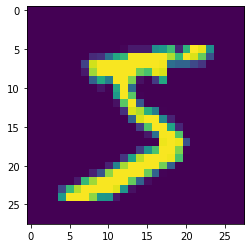

In [166]:
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = (1/255.0)*x_train
x_test = (1/255.0)*x_test
y_train = to_categorical(y_train.reshape([-1, 1]))
y_test = to_categorical(y_test.reshape([-1, 1]))
plt.imshow(x_train[0])

In [145]:
input_layer = l.Input((28,28))
Intermediate_layer = l.Flatten()(input_layer)
Intermediate_layer=l.Dense(256, activation='relu')(Intermediate_layer)
Intermediate_layer=l.Dense(256, activation='relu')(Intermediate_layer)
output_layer = l.Dense(10, activation="softmax")(Intermediate_layer)
model = m.Model(input_layer, output_layer)
model.summary()
model.compile(optimizer=o.SGD(),
loss='categorical_crossentropy',
metrics=['accuracy'])

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.fit(x_train,y_train, epochs=5, validation_data = (x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6011 - accuracy: 0.8469 - val_loss: 0.2964 - val_accuracy: 0.9163
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9198 - val_loss: 0.2453 - val_accuracy: 0.9279
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2323 - accuracy: 0.9337 - val_loss: 0.2130 - val_accuracy: 0.9393
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1989 - accuracy: 0.9440 - val_loss: 0.1796 - val_accuracy: 0.9465
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1737 - accuracy: 0.9507 - val_loss: 0.1612 - val_accuracy: 0.9527


In [111]:
import h5py
from skimage.transform import warp, AffineTransform #pip install scikit-image
i = 1.3
j = 0.5
d = 4
f = -5
x_new = x_train.copy()
for q in range(x_train.shape[0]):
    x_new[q,:,:] = warp(x_train[q,:,:], AffineTransform(scale = (i,j),translation=(-d,-f)).inverse)

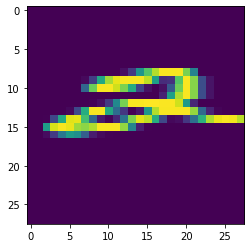

In [112]:
plt.imshow(x_new[5])
plt.show()

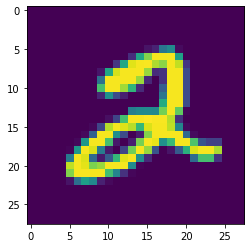

In [113]:
plt.imshow(x_train[5])
plt.show()

In [163]:
print(model.evaluate(x_new, y_train))
print(model.evaluate(x_train, y_train))
print(x_train.shape)
x_train = x_train.reshape(60000, 28,28,1)
x_new = x_new.reshape(60000, 28, 28,1)

1875/1875 [==============================] - 2s 1ms/step - loss: 4.1282 - accuracy: 0.2315
[4.128215789794922, 0.23145000636577606]
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1607 - accuracy: 0.9537
[0.16065548360347748, 0.9537000060081482]
(60000, 28, 28, 1)


In [169]:
from keras.layers import Input, LeakyReLU, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def source(input_shape = (28,28,1), num_classes = 10, print_summary = True):

        # Use functional API for distinguishing M_s and C easily
        input_ = Input(shape = input_shape)

        # first conv layer
        Conv1 = Conv2D(128, kernel_size=(3,3), 
                            input_shape = input_shape, padding = 'same')(input_)
        LeaRel1 = LeakyReLU(alpha=0.05)(Conv1)
        MaxPool1 = MaxPooling2D(pool_size=(3, 3))(LeaRel1)
        Drop1 = Dropout(0.3)(MaxPool1)


        # Second conv layer
        Conv2 = Conv2D(128, kernel_size=(3,3), 
                            input_shape = input_shape, padding = 'same')(Drop1)
        LeaRel2 = LeakyReLU(alpha=0.05)(Conv2)
        MaxPool2 = MaxPooling2D(pool_size=(3, 3))(LeaRel2)
        Drop2 = Dropout(0.3)(MaxPool2)

        # third conv layer
        Conv3 = Conv2D(64, kernel_size=(3,3), 
                            input_shape = input_shape, padding = 'same')(Drop2)
        LeaRel3 = LeakyReLU(alpha=0.05)(Conv3)
        MaxPool3 = MaxPooling2D(pool_size=(3, 3))(LeaRel3)
        Drop3 = Dropout(0.3)(MaxPool3)

        # third conv layer
        Conv4 = Conv2D(64, kernel_size=(3,3), 
                            input_shape = input_shape, padding = 'same')(Drop3)
        LeaRel4 = LeakyReLU(alpha=0.05)(Conv4)
        Drop4 = Dropout(0.3)(LeaRel4)

        Flat = Flatten()(Drop4)    

        Dense5 = Dense(64, activation = 'relu')(Flat)
        Drop5 = Dropout(0.3)(Dense5)
        # add classifier   
        Hidden_C = Dense(10,activation = 'relu')(Drop5)
        C = Dense(num_classes, activation='softmax')(Hidden_C)
        
        model = m.Model(input_, C)

        # print summary
        if print_summary:
            model.summary()

        return model

source_net = source()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 9, 9, 128)         0  

In [171]:
source_net.compile(loss = 'categorical_crossentropy', optimizer = o.Adam(),
    metrics = ['accuracy'])
source_net.fit(x_train, y_train, epochs=1, validation_data = (x_test,y_test))

1875/1875 [==============================] - 128s 68ms/step - loss: 0.1355 - accuracy: 0.9646 - val_loss: 0.0392 - val_accuracy: 0.9891


In [178]:
from adapy.adaptation import AdaPy
M_s = m.Model(source_net.inputs, source_net.layers[-3].get_output_at(-1))
inputC = Input((64,))
classifier1 = source_net.layers[-2](inputC) 
classifier2 = source_net.layers[-1](classifier1) 
C = Model(inputC, classifier2)

NameError: name 'Model' is not defined

In [203]:
class ADDA():
    def __init__(self, Xtarget, Xsource, source_rep, dd = None, mt = None):


        #-------------------------------------------------------------------
        #===================================================================
        #-------------------------------------------------------------------
        self.X = Xtarget
        self.Xs = Xsource
        # input shape
        self.rows = 28
        self.cols = 28
        self.channels = 1
        self.shape = (self.rows, self.cols, self.channels)
        self.num_classes = 10
        # load model
        ms_network = source_rep
        # Store the source network
        self.source = m.clone_model(ms_network)
        self.source.set_weights(ms_network.get_weights()) 
        self.source.trainable = False
        self.val_scores = []
        #-------------------------------------------------------------------
        #===================================================================
        #-------------------------------------------------------------------


        # Store Mt as copy of Ms
        if mt is None:
            self.target = m.clone_model(ms_network)
            self.target.set_weights(ms_network.get_weights())
        elif mt is not None:
            self.target = mt
            # need this because of strange
            # order of execution in train

        # Store domain discriminator
        if dd is None:
            self.dd = self.build_domain_discriminator()
        elif dd is not None:
            self.dd = dd
        self.dd.trainable = True
        self.dd.compile(loss = 'binary_crossentropy', optimizer = o.Adam(lr= 0.0005),
                    metrics = ['accuracy'])

        # Define the combined model for target training
        target_input = l.Input(shape= self.shape)
        target_output = self.target(target_input)

        # For the combined model we will only train the target
        # representation network
        domain_guess = self.dd(target_output)
        
        self.train_target = m.Model(target_input, domain_guess)

        # write logs for target
        self.optimizer_train_target = o.Adam(lr= 0.0002)
        # self.optimizer_train_target = NormalizedOptimizer(self.optimizer_train_target, normalization="l2")
        self.dd.trainable = False
        self.train_target.compile(loss='binary_crossentropy',
                optimizer = self.optimizer_train_target , metrics = ['accuracy'])


    def build_domain_discriminator(self):#128,128

        inputDD = Input((64,), name = 'inpDD')

        # first layer
        Dense1 = Dense(256, activation = 'relu', kernel_initializer='random_uniform')(inputDD)
        drop1 = Dropout(0.1)(Dense1)
        # second layer
        Dense2 = Dense(256, activation = 'relu',kernel_initializer='he_normal')(drop1)
        drop2 = Dropout(0.1)(Dense2)
        # third layer
        Dense3 = Dense(128, activation = 'relu',kernel_initializer='he_normal')(drop2)
        drop3 = Dropout(0.1)(Dense3)

        # fourth layer
        Dense4 = Dense(128, activation = 'relu',kernel_initializer='he_normal')(drop3)
        drop4 = Dropout(0.1)(Dense4)

        Dense5 = Dense(1, activation = 'sigmoid',kernel_initializer='he_normal')(drop4)

        return m.Model(inputDD, Dense5)


    #method for training
    def train(self, epochs, batch_size=256,
              save_interval=5):
        

        #-------------------------------------------------------------------
        #===================================================================
        #-------------------------------------------------------------------
                
        X_train = self.X
        X_source = self.Xs
        # source - target labels: 1s for source
        source_label = np.ones((batch_size, 1))
        target_label = np.zeros((batch_size, 1))
        
        self.dd.summary()
        self.train_target.summary()

        #-------------------------------------------------------------------
        #===================================================================
        #-------------------------------------------------------------------

        #training loop
        for epoch in range(1,epochs):
            discriminator_iterations = 10
            if epoch == 1:
                discriminator_iterations = 25
            for _ in range(discriminator_iterations):
                # ---------------------
                #  Train Domain Discriminator
                # --------------------- 
                
                # Select a random batch of measurements
                idx = np.random.randint(0, 
                                        X_train.shape[0], 
                                        batch_size)
                target_data = X_train[idx]
                idx = np.random.randint(0, 
                                        X_source.shape[0], 
                                        batch_size)
                source_data = X_source[idx]
                
                # Obtain target network output
                target_latent = self.target.predict(target_data)
            

                #-------------------------------------------------------------------
                #===================================================================
                #-------------------------------------------------------------------
                

                # Train the dd on target input
                d_loss_target = self.dd.train_on_batch(target_latent,
                                                target_label)
                # Obtain source output
                source_latent = self.source.predict(source_data)   

                # Train the dd on source input
                d_loss_source = self.dd.train_on_batch(source_latent,
                                                source_label)
                #-------------------------------------------------------------------
                #===================================================================
                #-------------------------------------------------------------------

            print("iter {0}".format(epoch))
            
            target_loss = self.train_target.train_on_batch(target_data,
                                                source_label)

In [204]:
pre_transfer_accuracy = source_net.evaluate(x_new, y_train)

1875/1875 [==============================] - 19s 10ms/step - loss: 2.3510 - accuracy: 0.3683


In [205]:
adda = ADDA(x_new, x_train, M_s)

In [206]:
adda.train(10)

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpDD (InputLayer)           [(None, 64)]              0         
_________________________________________________________________
dense_77 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_72 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0  

In [201]:
post_trans = m.Model(adda.target.input, C(adda.target(adda.target.input)))
post_trans.compile(loss = 'categorical_crossentropy', optimizer = o.Adam(),
 metrics = ['accuracy'])

In [202]:
post_trans.evaluate(x_new, y_train)

1875/1875 [==============================] - 16s 9ms/step - loss: 2.1022 - accuracy: 0.4130


[2.10217547416687, 0.4130333364009857]